In [1]:
# Load data
data_path = '/Users/saimasultana/AAPL.csv'

Root Mean Squared Error: 0.19772292045129486
R-squared: 0.9967761087847954


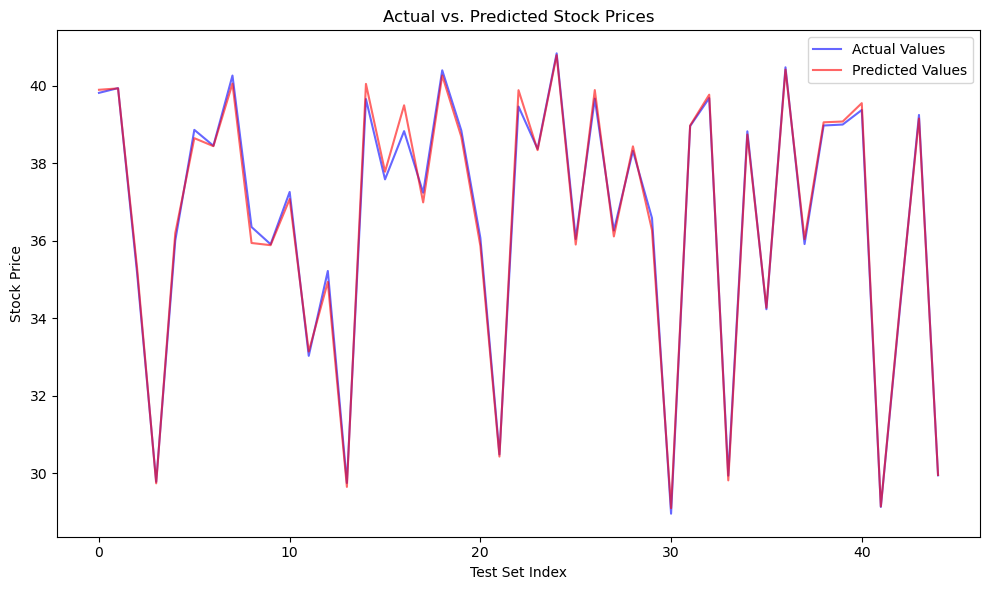

Root Mean Squared Error: 0.20088972731307655
R-Squared Score: 0.9964442433625269


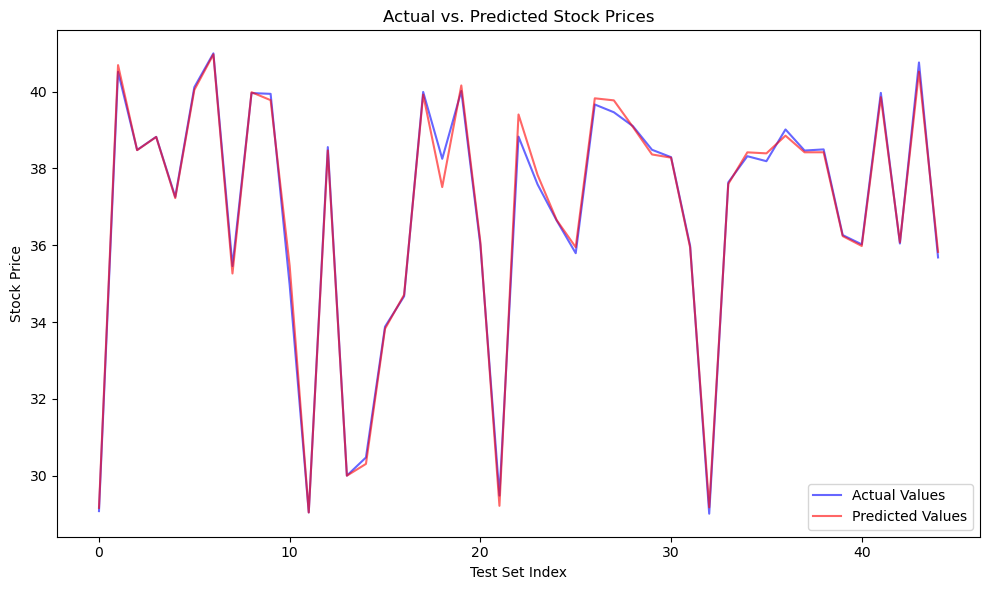

In [2]:
# Load preprocessed test data for SVM
%run "./SVM.ipynb"
X_test_svm = X_test
svm_model = best_svm_model

# Load preprocessed test data for Random Forest
%run "./Random_Forest.ipynb"
X_test_rf = X_test
rf_model = model

In [3]:
# Make predictions using both models
svm_predictions = svm_model.predict(X_test_svm)
rf_predictions = rf_model.predict(X_test_rf)

# Define weights for each model
svm_weight = 0.1 # Weight for SVM model
rf_weight = 0.9  # Weight for Random Forest model

# Combine predictions using weighted averaging
hybrid_predictions = (svm_weight * svm_predictions) + (rf_weight * rf_predictions)

# Evaluate the hybrid model
mse = mean_squared_error(y_test, hybrid_predictions)
hybrid_rmse = np.sqrt(mse)
hybrid_r2 = r2_score(y_test, hybrid_predictions)

/Users/saimasultana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


In [4]:
print('Hybrid Model - Root Mean Squared Error:', hybrid_rmse)
print('Hybrid Model - R-Squared Score:', hybrid_r2)

Hybrid Model - Root Mean Squared Error: 0.40762297650936147
Hybrid Model - R-Squared Score: 0.9853602425057841


In [5]:
best_rmse = float('inf')  # Initialize with a high value
best_r2 = float('-inf')   # Initialize with a low value
best_svm_weight = 0.0
best_rf_weight = 0.0

# Define the range of weights to search
weight_range = np.arange(0.0, 1.01, 0.01)  # Weights sum up to 1.0

# Iterate over all possible combinations of weights
for svm_weight in weight_range:
    rf_weight = 1.0 - svm_weight  # Ensure weights sum up to 1.0

    # Combine predictions using weighted averaging
    hybrid_predictions = (svm_weight * svm_predictions) + (rf_weight * rf_predictions)

    # Evaluate the hybrid model
    mse = mean_squared_error(y_test, hybrid_predictions)
    hybrid_rmse = np.sqrt(mse)
    hybrid_r2 = r2_score(y_test, hybrid_predictions)

    # Update best weights if a better combination is found
    if hybrid_rmse < best_rmse and hybrid_r2 > best_r2:
        best_rmse = hybrid_rmse
        best_r2 = hybrid_r2
        best_svm_weight = svm_weight
        best_rf_weight = rf_weight

print("Best weights:")
print("SVM Weight:", best_svm_weight)
print("RF Weight:", best_rf_weight)
print("Best RMSE:", best_rmse)
print("Best R-squared:", best_r2)


Best weights:
SVM Weight: 0.0
RF Weight: 1.0
Best RMSE: 0.20088972731307655
Best R-squared: 0.9964442433625269
